i give thant 3 persons who inspired me on this work :
trainer jeremy Aschenbenner , competitors karelVerhoeven and Badpocyk

# Prediction

# Data load

In [1]:
import os
print(os.listdir("../input"))

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline



['test', 'sample_submission', 'sample_submission.csv', 'test.csv', 'train.csv', 'train']


In [2]:
df1 = os.path.join("..", "input", "train.csv")
df2 = os.path.join("..", "input", "test.csv")

In [3]:
train = pd.read_csv(df1, index_col=0)
train.head() 

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
train.shape

(1458644, 10)

In [5]:
train.dtypes

vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [6]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [7]:
test = pd.read_csv(df2, index_col=0)
test.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
id,,,,,,,,
id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [8]:
test.dtypes

vendor_id               int64
pickup_datetime        object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
dtype: object

In [9]:
test.shape

(625134, 8)

# Data exploration

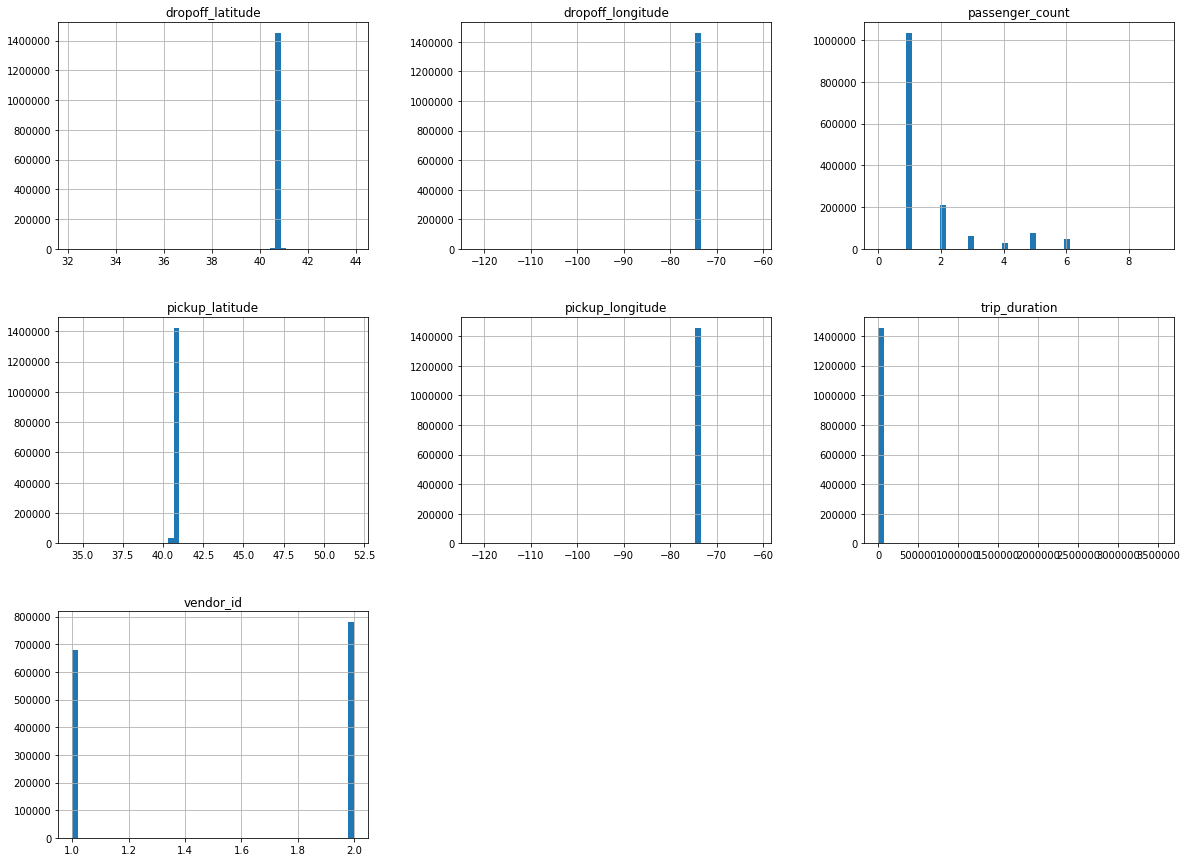

In [10]:
train.hist(bins=50, figsize=(20,15))
plt.show()

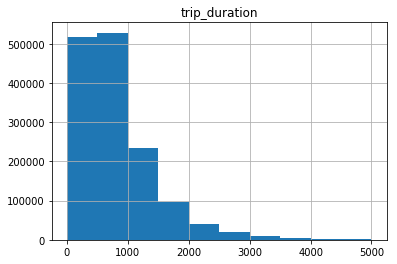

In [11]:
train.loc[train['trip_duration'] < 5000, 'trip_duration'].hist();

plt.title('trip_duration')
plt.show()

#### Transformation trip_duration:

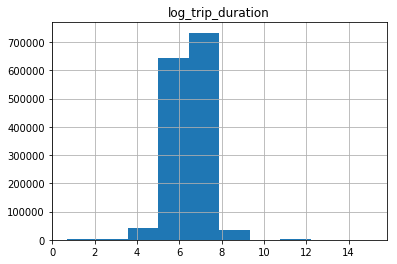

In [12]:
np.log1p(train['trip_duration']).hist();
plt.title('log_trip_duration')
plt.show()

# Data preprocessing

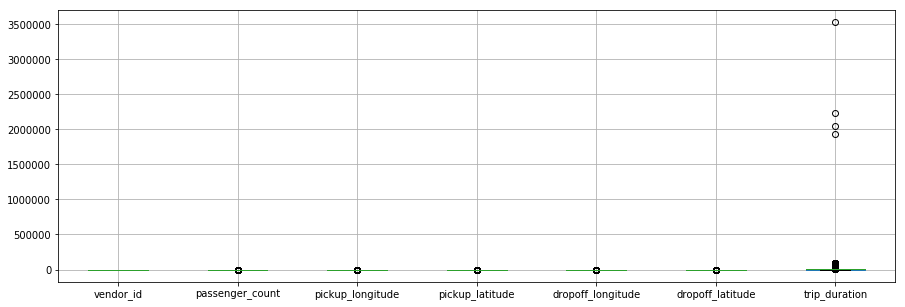

In [13]:
plt.subplots(figsize=(15,5))
train.boxplot(); 

In [14]:
train = train[(train.trip_duration < 5000)]

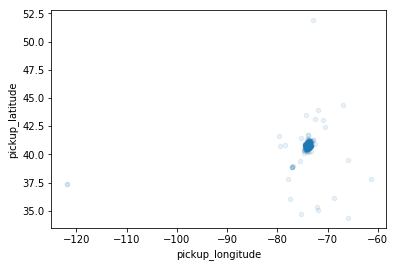

In [15]:
train.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude', alpha=0.1);

In [16]:
train = train.loc[(train['pickup_longitude'] > -75) & (train['pickup_longitude'] < -73)]
train = train.loc[(train['pickup_latitude'] > 40) & (train['pickup_latitude'] < 41)]

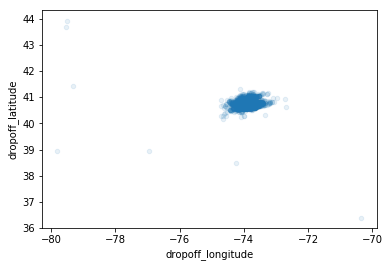

In [17]:
train.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude', alpha=0.1);

In [18]:
train = train.loc[(train['dropoff_longitude'] > -75) & (train['dropoff_longitude'] < -73)]
train = train.loc[(train['dropoff_latitude'] > 40.5) & (train['dropoff_latitude'] < 41.5)]

#### •  CHEKC Passenger_count

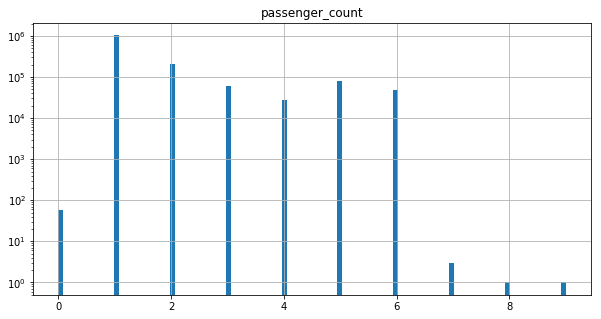

In [19]:
train['passenger_count'].hist(bins=100, log=True, figsize=(10,5));
plt.title('passenger_count')
plt.show()

In [20]:
train = train.loc[(train['passenger_count'] >= 0) & (train['passenger_count'] <= 6)]

### Valeurs manquantes

In [21]:
train.isnull().sum()

vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [22]:
train.duplicated().sum()

5

In [23]:
train = train.drop_duplicates()
train.duplicated().sum()

0

In [24]:
train.dtypes

vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [25]:
train.drop(["store_and_fwd_flag"], axis=1, inplace=True)
test.drop(["store_and_fwd_flag"], axis=1, inplace=True)

In [26]:
train.shape, test.shape

((1454722, 9), (625134, 7))

# Featuring

In [27]:
plg, plt = 'pickup_longitude', 'pickup_latitude'
dlg, dlt = 'dropoff_longitude', 'dropoff_latitude'
pdt, ddt = 'pickup_datetime', 'dropoff_datetime'

In [28]:
from math import radians, cos, sin, asin, sqrt
from datetime import datetime

#### calcul de la distance 

     KAGGLE de yan competitor 
    

In [29]:
def haversine(lon1, lat1, lon2, lat2):
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

def euclidian_distance(x):
    x1, y1 = np.float64(x[plg]), np.float64(x[plt])
    x2, y2 = np.float64(x[dlg]), np.float64(x[dlt])    
    return haversine(x1, y1, x2, y2)

In [30]:

train['distance'] = train[[plg, plt, dlg, dlt]].apply(euclidian_distance, axis=1)

In [31]:

test['distance'] = test[[plg, plt, dlg, dlt]].apply(euclidian_distance, axis=1)

#### Conversion en datetime

In [32]:
train[pdt] = train[pdt].apply(lambda x : datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
train[ddt] = train[ddt].apply(lambda x : datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [33]:
test[pdt] = test[pdt].apply(lambda x : datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))


In [34]:
train['month'] = train[pdt].apply(lambda x : x.month)
train['week_day'] = train[pdt].apply(lambda x : x.weekday())
train['day_month'] = train[pdt].apply(lambda x : x.day)
train['pickup_time_minutes'] = train[pdt].apply(lambda x : x.hour * 60.0 + x.minute)

In [35]:
test['month'] = test[pdt].apply(lambda x : x.month)
test['week_day'] = test[pdt].apply(lambda x : x.weekday())
test['day_month'] = test[pdt].apply(lambda x : x.day)
test['pickup_time_minutes'] = test[pdt].apply(lambda x : x.hour * 60.0 + x.minute)

Apercu sur les nouvelles colonnes creer

In [36]:
train.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,month,week_day,day_month,pickup_time_minutes
id,,,,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,1.498521,3,0,14,1044.0
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,1.805507,6,6,12,43.0
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,6.385098,1,1,19,695.0
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,1.485498,4,2,6,1172.0
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,1.188588,3,5,26,810.0


In [37]:
test.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,month,week_day,day_month,pickup_time_minutes
id,,,,,,,,,,,,
id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,2.746426,6,3,30,1439.0
id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,2.759239,6,3,30,1439.0
id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,1.306155,6,3,30,1439.0
id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,5.269088,6,3,30,1439.0
id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,0.960842,6,3,30,1439.0


In [38]:
train.shape, test.shape

((1454722, 14), (625134, 12))

### Features selection

In [39]:
features_train = ["vendor_id", "passenger_count", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "distance", "month", "week_day", "day_month", "pickup_time_minutes"]
X_train = train[features_train]
y_train = np.log1p(train["trip_duration"])

features_test = ["vendor_id", "passenger_count", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "distance", "month", "week_day", "day_month", "pickup_time_minutes"]
X_test = test[features_test]

# Model

Notre choix a été porté sur le Randforest . 
Random Forest est un algorithme de machine learning qui est particulièrement efficace pour repérer des liens entre une variable à expliquer et des variables explicatives. Random Forest va classer les variables explicatives en fonction de leurs liens avec la variable à expliquer.

In [40]:
from sklearn.ensemble import RandomForestRegressor 


In [41]:
#param_grid_rf = {'n_estimators' : [10, 20, 100],
                 #'min_samples_leaf' : [2, 4, 6],
                 #'max_features' : [0.2, 0.5, 'auto'],
                 #'max_depth' : [50, 80, 100]}
#rf = RandomForestRegressor()
#grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf)
#grid_search_rf.fit(X_train, y_train)

In [42]:
#print("Score final : ", round(grid_search_rf.score(X_train, y_train)*100, 4), " %")
#print("Meilleurs paramètres : ", grid_search_rf.best_params_)
#print("Meilleure configuration : ", grid_search_rf.best_estimator_)

In [43]:
#rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, min_samples_split=15, max_depth=100, bootstrap=True, n_jobs=-1)
#rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=2, max_features=0.7, max_depth=100, bootstrap=True, n_jobs=-1)
#rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, min_samples_split=15, max_depth=100, bootstrap=True, n_jobs=-1)

#0.403
#rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=2, max_features='auto', max_depth=50, bootstrap=True, n_jobs=-1)

rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=5, min_samples_split=10, max_features='auto', max_depth=50, bootstrap=True, n_jobs=-1)

In [44]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# Prédictions

In [45]:
#y_pred = grid_search_rf.predict(X_test)

In [46]:
log_pred = rf.predict(X_test)
y_pred = np.exp(log_pred) - np.ones(len(log_pred)) 

# Submission

In [47]:
submission = pd.DataFrame({'id': test.index, 'trip_duration': y_pred})
submission.head()

,id,trip_duration
0,id3004672,766.316232
1,id3505355,568.625254
2,id1217141,402.381593
3,id2150126,1093.944863
4,id1598245,357.875832


In [48]:
submission.to_csv("submission.csv", index=False)